In [4]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline


In [5]:
starbucks = pd.read_csv("data//directory.csv")
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [6]:
starbucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
Brand             25600 non-null object
Store Number      25600 non-null object
Store Name        25600 non-null object
Ownership Type    25600 non-null object
Street Address    25598 non-null object
City              25585 non-null object
State/Province    25600 non-null object
Country           25600 non-null object
Postcode          24078 non-null object
Phone Number      18739 non-null object
Timezone          25600 non-null object
Longitude         25599 non-null float64
Latitude          25599 non-null float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


In [7]:
starbucks.isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [8]:
star = starbucks.dropna(how='any',subset=['City'])
star.isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                 0
State/Province       0
Country              0
Postcode          1507
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [9]:
# 星巴克旗下有哪些品牌？
print("星巴克旗下品牌有：\n",starbucks.Brand.value_counts())
# 把重心放在星巴克的咖啡门店上面，所以只查看Brand是Starbucks的数据集内容。
coffee = starbucks[starbucks.Brand=='Starbucks']
# 全世界一共有多少家星巴克门店？
print("-------------------------")
print(coffee.shape)

星巴克旗下品牌有：
 Starbucks                25249
Teavana                    348
Evolution Fresh              2
Coffee House Holdings        1
Name: Brand, dtype: int64
-------------------------
(25249, 13)


In [10]:
df = starbucks.groupby(["Country"]).size()
print("全世界一共多少个国家开设了星巴克门店:",df.size)
df1 = df.sort_values( ascending=False)
print("排名前10的国家：\n",df1.head(10))

全世界一共多少个国家开设了星巴克门店: 73
排名前10的国家：
 Country
US    13608
CN     2734
CA     1468
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
dtype: int64


In [11]:
# 星巴克门店数排名后10的国家
# df2 = df.sort_values()
# df2.head(10)
print("排名后10的国家：\n",df1.tail(10))

排名后10的国家：
 Country
BO    4
KH    4
AW    3
ZA    3
CW    3
SK    3
TT    3
LU    2
MC    2
AD    1
dtype: int64


unique()：是以数组形式（numpy.ndarray）返回列的所有唯一值（特征的所有唯一值）

nunique()：返回dataframe中列的唯一值的个数,也可用于series

In [12]:

# 全世界一共多少个国家开设了星巴克门店？
coffee.Country.nunique()


73

Text(0.5, 0, 'Countries')

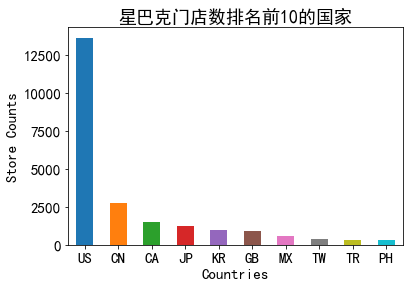

In [13]:
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'SimHei'
# # 拥有星巴克门店最多的国家是哪里？
# plt.figure(1,figsize=(8,6))
# count_starbucks =coffee.Country.value_counts()
# count_top10 = count_starbucks.head(10)
# print(count_top10)
# count_top10.plot(kind='bar',rot=0)
df1.head(10).plot(kind='bar',rot=0)
plt.title('星巴克门店数排名前10的国家')
plt.ylabel('Store Counts')
plt.xlabel('Countries')

Text(0.5, 0, 'Countries')

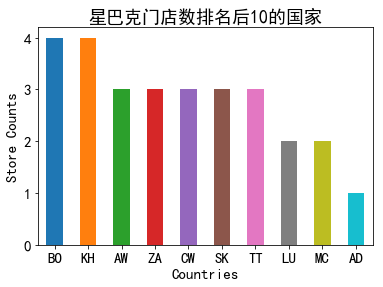

In [14]:
# plt.figure(1,figsize=(8,6))
# count_starbucks =coffee.Country.value_counts()
# count_last10 = count_starbucks.tail(10)
# print(count_last10)
df1.tail(10).plot(kind='bar',rot=0)
plt.title('星巴克门店数排名后10的国家')
plt.ylabel('Store Counts')
plt.xlabel('Countries')

In [15]:
star = starbucks.dropna(how='any',subset=['City'])
star.isnull().sum()
count_starbucks_city = star.City.value_counts()
print("全世界星巴克门店数量排名前10的城市：\n",count_starbucks_city.head(10))

全世界星巴克门店数量排名前10的城市：
 上海市            542
Seoul          243
北京市            234
New York       232
London         216
Toronto        192
Chicago        180
Mexico City    180
Las Vegas      156
Seattle        156
Name: City, dtype: int64


Text(0.5, 0, 'Cities')

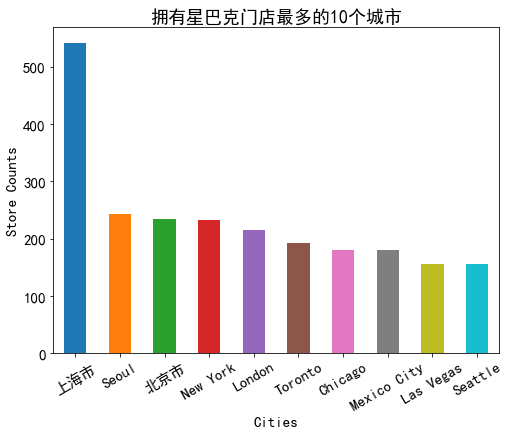

In [16]:
plt.figure(1,figsize=(8,6))
count_starbucks_city =star.City.value_counts()
city_top10 = count_starbucks_city.head(10)
city_top10.plot(kind='bar',rot=30)
plt.title('拥有星巴克门店最多的10个城市')
plt.ylabel('Store Counts')
plt.xlabel('Cities')

可以看到数据不是很规范，城市名称既有中文又有英文，而且上海被存储为ShangHai和Shanghai。
对于上海的问题，我们将拼音全部改为小写即可；
对于中文和拼音混用的问题，可以使用相应的python库（如库pinyin）将中文转换为拼音后作统计。

In [17]:
import pinyin
#选择中国的数据
df = star[star["Country"]=="CN"]

df1 = df.copy()
#将城市名改为小写
df1["City"] = df1["City"].apply(lambda x:x.lower())
# df1.shape
# df2 = df1.copy()
#将汉字城市名改为小写拼音
df1["City"] = df1["City"].apply(lambda x:pinyin.get(x, format="strip", delimiter="")[0:-3]) #去掉“市”的拼音
#统计每个城市的星巴克数量
df1 = df1.groupby(["City"]).size().sort_values( ascending=False)
df1.head(10)

City
shanghai     542
beijing      234
hangzhou     117
shenzhen     113
guangzhou    106
hong k       104
chengdu       98
suzhou        90
nanjing       73
wuhan         67
dtype: int64

这里使用到了DataFrame.apply(func)方法，该方法将函数func应用到整个DataFrame上，
也可以通过指定axis参数来指定每一行或每一列的数据应用函数func。

接下来使用reset_index方法将上一步得到的数据封装到一个新的DataFrame中排序即可。

Text(0.5, 0, 'Cities')

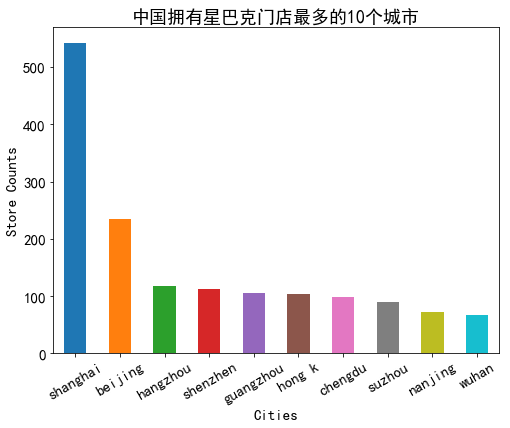

In [18]:
plt.figure(1,figsize=(8,6))
df1.head(10).plot(kind='bar',rot=30)
plt.title('中国拥有星巴克门店最多的10个城市')
plt.ylabel('Store Counts')
plt.xlabel('Cities')


Company Owned：公司独资直营，这也是星巴克门店最多的经营方式

Licensed: 许可经营

Joint Venture: 合资经营，比如：国内江浙沪地区的星巴克最早就是由星巴克与统一集团联手经营

Franchise：授权经营，类似麦当劳的经营模式


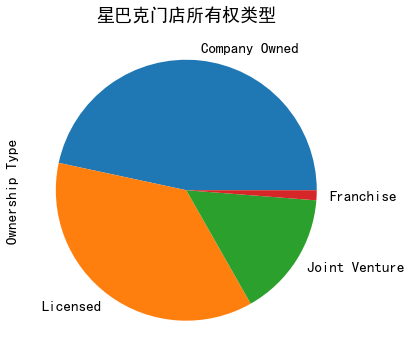

In [19]:
plt.figure(1,figsize=(8,6))
ownership = star['Ownership Type'].value_counts()
plt.title('星巴克门店所有权类型')
ownership.plot(kind='pie')

